# Phase 1: Problem Understanding and Data Exploration
## Travel Destination Advisor System

**Group Members:**
- Abdulaziz Alasmari - 443100261
- Abdulaziz Almutairi - 443101720


---
## 1. Dataset Goal & Source

### Purpose of the Dataset
The **Travel Destinations Dataset** is designed to build an intelligent travel recommendation system. The goal is to:
- **Classify** travel destinations based on travel style preferences (Adventure, Relaxation, Culture, Budget, Luxury)
- **Predict** destination ratings based on features like cost, activities, and climate
- **Recommend** personalized destinations to travelers based on their preferences and constraints
- **Cluster** similar destinations to help travelers discover alternatives

### Dataset Source
**Source:** Custom curated dataset combining public travel data  
**Alternative Sources:** 
- Kaggle: https://www.kaggle.com/datasets (search for "travel destinations", "tourism data")
- TripAdvisor API data
- Government tourism statistics

### Domain
Travel and Tourism - Destination recommendation and travel planning

---
## 2. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


✅ All libraries imported successfully!


---
## 3. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/travel_destinations.csv')

print("✅ Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of observations (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

✅ Dataset loaded successfully!

Dataset shape: (60, 23)
Number of observations (rows): 60
Number of features (columns): 23


---
## 4. General Information

### 4.1 First Look at the Data

In [3]:
# Display first few rows
print("📊 First 5 rows of the dataset:")
df.head()

📊 First 5 rows of the dataset:


,destination_id,destination_name,country,continent,avg_cost_per_day_usd,season,climate,activities,travel_style,avg_rating,...,culture,adventure,relaxation,family_friendly,budget_friendly,luxury,urban,rural,safety_rating,tourist_density
0,1,Bali,Indonesia,Asia,75,Year-round,Tropical,"Beach,Temple,Surfing,Yoga","Relaxation,Adventure",4.7,...,1,1,1,1,1,0,0,1,4.3,High
1,2,Paris,France,Europe,200,Spring/Fall,Temperate,"Museums,Shopping,Dining,Sightseeing","Culture,Luxury",4.8,...,1,0,0,1,0,1,1,0,4.5,Very High
2,3,Tokyo,Japan,Asia,150,Spring/Fall,Temperate,"Technology,Dining,Shopping,Culture","Culture,Urban",4.9,...,1,0,0,1,0,1,1,0,4.8,Very High
3,4,Maldives,Maldives,Asia,350,Winter,Tropical,"Diving,Snorkeling,Beach,Spa","Relaxation,Luxury",4.9,...,0,0,1,0,0,1,0,1,4.7,Medium
4,5,New York,USA,North America,250,Spring/Fall,Continental,"Museums,Shopping,Theater,Dining","Urban,Culture",4.6,...,1,0,0,1,0,1,1,0,4.2,Very High


In [4]:
# Display last few rows
print("📊 Last 5 rows of the dataset:")
df.tail()

📊 Last 5 rows of the dataset:


,destination_id,destination_name,country,continent,avg_cost_per_day_usd,season,climate,activities,travel_style,avg_rating,...,culture,adventure,relaxation,family_friendly,budget_friendly,luxury,urban,rural,safety_rating,tourist_density
55,56,Cambodia,Cambodia,Asia,45,Winter,Tropical,"Temples,History,Food,Culture","Budget,Culture",4.6,...,1,0,0,1,1,0,0,1,4.1,High
56,57,Ecuador,Ecuador,South America,75,Year-round,Varied,"Galapagos,Hiking,Culture,Wildlife","Adventure,Nature",4.7,...,1,1,0,1,0,0,0,1,4.2,Low
57,58,Tanzania,Tanzania,Africa,110,Summer,Tropical,"Safari,Kilimanjaro,Beach,Wildlife","Adventure,Nature",4.7,...,0,1,0,1,0,0,0,1,4.2,Medium
58,59,Tunisia,Tunisia,Africa,60,Spring/Fall,Mediterranean,"Beach,History,Desert,Culture","Culture,Budget",4.3,...,1,0,0,1,1,0,0,1,3.9,Medium
59,60,Estonia,Estonia,Europe,95,Summer,Temperate,"Medieval,Digital,Nature,Culture","Culture,Urban",4.6,...,1,0,0,1,1,0,1,0,4.7,Low


### 4.2 Dataset Information and Data Types

In [5]:
# Display detailed information
print("📋 Dataset Information:")
df.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination_id        60 non-null     int64  
 1   destination_name      60 non-null     object 
 2   country               60 non-null     object 
 3   continent             60 non-null     object 
 4   avg_cost_per_day_usd  60 non-null     int64  
 5   season                60 non-null     object 
 6   climate               60 non-null     object 
 7   activities            60 non-null     object 
 8   travel_style          60 non-null     object 
 9   avg_rating            60 non-null     float64
 10  num_reviews           60 non-null     int64  
 11  beach                 60 non-null     int64  
 12  mountains             60 non-null     int64  
 13  culture               60 non-null     int64  
 14  adventure             60 non-null     int64  
 15  re

In [6]:
# Display data types and count
print("\n📊 Data Types Summary:")
print(df.dtypes.value_counts())

print("\n" + "="*60)
print("Detailed Data Types:")
print("="*60)
for col in df.columns:
    print(f"{col:30s} : {str(df[col].dtype):10s}")


📊 Data Types Summary:
int64      13
object      8
float64     2
Name: count, dtype: int64

Detailed Data Types:
destination_id                 : int64     
destination_name               : object    
country                        : object    
continent                      : object    
avg_cost_per_day_usd           : int64     
season                         : object    
climate                        : object    
activities                     : object    
travel_style                   : object    
avg_rating                     : float64   
num_reviews                    : int64     
beach                          : int64     
mountains                      : int64     
culture                        : int64     
adventure                      : int64     
relaxation                     : int64     
family_friendly                : int64     
budget_friendly                : int64     
luxury                         : int64     
urban                          : int64     
rural  

### 4.3 Feature Descriptions

| Feature | Type | Description |
|---------|------|-------------|
| destination_id | int | Unique identifier for each destination |
| destination_name | object | Name of the travel destination |
| country | object | Country where destination is located |
| continent | object | Continent of the destination |
| avg_cost_per_day_usd | int | Average daily cost in USD |
| season | object | Best season(s) to visit |
| climate | object | Climate type of the destination |
| activities | object | Main activities available |
| travel_style | object | Primary travel styles suited for destination |
| avg_rating | float | Average user rating (1-5 scale) |
| num_reviews | int | Number of user reviews |
| beach | int | Has beach attractions (1=Yes, 0=No) |
| mountains | int | Has mountain attractions (1=Yes, 0=No) |
| culture | int | Strong cultural attractions (1=Yes, 0=No) |
| adventure | int | Adventure activities available (1=Yes, 0=No) |
| relaxation | int | Relaxation-focused (1=Yes, 0=No) |
| family_friendly | int | Suitable for families (1=Yes, 0=No) |
| budget_friendly | int | Budget-friendly destination (1=Yes, 0=No) |
| luxury | int | Luxury destination (1=Yes, 0=No) |
| urban | int | Urban/city destination (1=Yes, 0=No) |
| rural | int | Rural/countryside destination (1=Yes, 0=No) |
| safety_rating | float | Safety rating (1-5 scale) |
| tourist_density | object | Tourist traffic level (Low/Medium/High/Very High) |

### Target Variables for ML Tasks:
- **Classification:** `travel_style`, `tourist_density`, `climate`
- **Regression:** `avg_rating`, `avg_cost_per_day_usd`
- **Clustering:** Grouping destinations by features

---
## 5. Statistical Summary & Visualization

### 5.1 Numerical Features Summary

In [7]:
# Statistical summary of numerical columns
print("📊 Statistical Summary of Numerical Features:")
df.describe()

📊 Statistical Summary of Numerical Features:


,destination_id,avg_cost_per_day_usd,avg_rating,num_reviews,beach,mountains,culture,adventure,relaxation,family_friendly,budget_friendly,luxury,urban,rural,safety_rating
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,131.583333,4.655000,6563.666667,0.566667,0.483333,0.716667,0.400000,0.300000,0.916667,0.400000,0.233333,0.366667,0.683333,4.430000
std,17.464249,71.919751,0.125448,2823.548655,0.499717,0.503939,0.454420,0.494032,0.462125,0.278718,0.494032,0.426522,0.485961,0.469102,0.337639
min,1.000000,40.000000,4.300000,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000
25%,15.750000,75.000000,4.600000,4675.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.200000
50%,30.500000,110.000000,4.700000,5750.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.500000
75%,45.250000,180.000000,4.700000,8375.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.700000
max,60.000000,350.000000,4.900000,15000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.900000


In [8]:
# Additional statistics
print("\n📈 Additional Statistics:")
numerical_cols = df.select_dtypes(include=[np.number]).columns

stats_df = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Std Dev': df[numerical_cols].std(),
    'Variance': df[numerical_cols].var(),
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max(),
    'Range': df[numerical_cols].max() - df[numerical_cols].min()
})

stats_df


📈 Additional Statistics:


,Mean,Median,Std Dev,Variance,Min,Max,Range
destination_id,30.500000,30.5,17.464249,3.050000e+02,1.0,60.0,59.0
avg_cost_per_day_usd,131.583333,110.0,71.919751,5.172451e+03,40.0,350.0,310.0
avg_rating,4.655000,4.7,0.125448,1.573729e-02,4.3,4.9,0.6
num_reviews,6563.666667,5750.0,2823.548655,7.972427e+06,2100.0,15000.0,12900.0
beach,0.566667,1.0,0.499717,2.497175e-01,0.0,1.0,1.0
mountains,0.483333,0.0,0.503939,2.539548e-01,0.0,1.0,1.0
culture,0.716667,1.0,0.454420,2.064972e-01,0.0,1.0,1.0
adventure,0.400000,0.0,0.494032,2.440678e-01,0.0,1.0,1.0
relaxation,0.300000,0.0,0.462125,2.135593e-01,0.0,1.0,1.0
family_friendly,0.916667,1.0,0.278718,7.768362e-02,0.0,1.0,1.0


### 5.2 Categorical Features Summary

In [9]:
# Summary of categorical columns
print("📊 Categorical Features Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most common: {df[col].mode()[0]} (appears {df[col].value_counts().iloc[0]} times)")
    print(f"  Value counts:\n{df[col].value_counts().head()}")

📊 Categorical Features Summary:

destination_name:
  Unique values: 60
  Most common: Amsterdam (appears 1 times)
  Value counts:
destination_name
Bali       1
Paris      1
Jordan     1
Mexico     1
Austria    1
Name: count, dtype: int64

country:
  Unique values: 58
  Most common: UAE (appears 2 times)
  Value counts:
country
USA          2
UAE          2
Indonesia    1
Malta        1
Jordan       1
Name: count, dtype: int64

continent:
  Unique values: 11
  Most common: Europe (appears 21 times)
  Value counts:
continent
Europe           21
Asia             14
Africa            7
South America     6
North America     3
Name: count, dtype: int64

season:
  Unique values: 7
  Most common: Spring/Fall (appears 20 times)
  Value counts:
season
Spring/Fall      20
Summer           13
Winter           12
Year-round        8
Winter/Summer     3
Name: count, dtype: int64

climate:
  Unique values: 9
  Most common: Tropical (appears 15 times)
  Value counts:
climate
Tropical         15
Temper

### 5.3 Distribution Visualizations

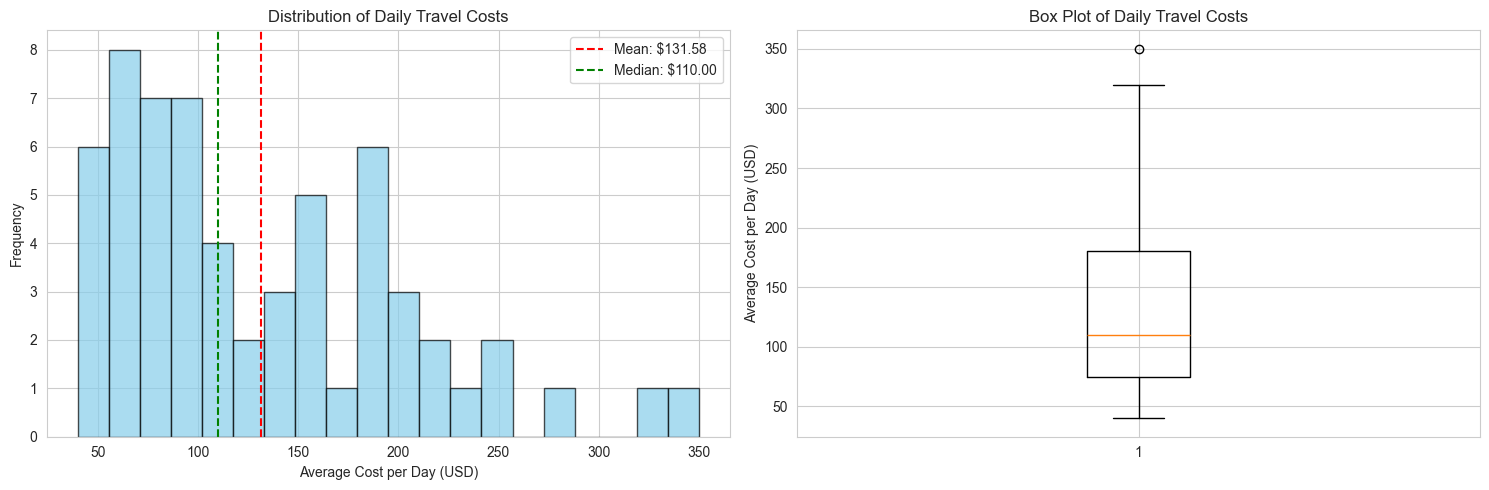

Mean Cost: $131.58
Median Cost: $110.00
Cost Range: $40 - $350


In [10]:
# Distribution of average cost per day
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['avg_cost_per_day_usd'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Average Cost per Day (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Daily Travel Costs')
axes[0].axvline(df['avg_cost_per_day_usd'].mean(), color='red', linestyle='--', label=f"Mean: ${df['avg_cost_per_day_usd'].mean():.2f}")
axes[0].axvline(df['avg_cost_per_day_usd'].median(), color='green', linestyle='--', label=f"Median: ${df['avg_cost_per_day_usd'].median():.2f}")
axes[0].legend()

# Box plot
axes[1].boxplot(df['avg_cost_per_day_usd'], vert=True)
axes[1].set_ylabel('Average Cost per Day (USD)')
axes[1].set_title('Box Plot of Daily Travel Costs')

plt.tight_layout()
plt.show()

print(f"Mean Cost: ${df['avg_cost_per_day_usd'].mean():.2f}")
print(f"Median Cost: ${df['avg_cost_per_day_usd'].median():.2f}")
print(f"Cost Range: ${df['avg_cost_per_day_usd'].min()} - ${df['avg_cost_per_day_usd'].max()}")

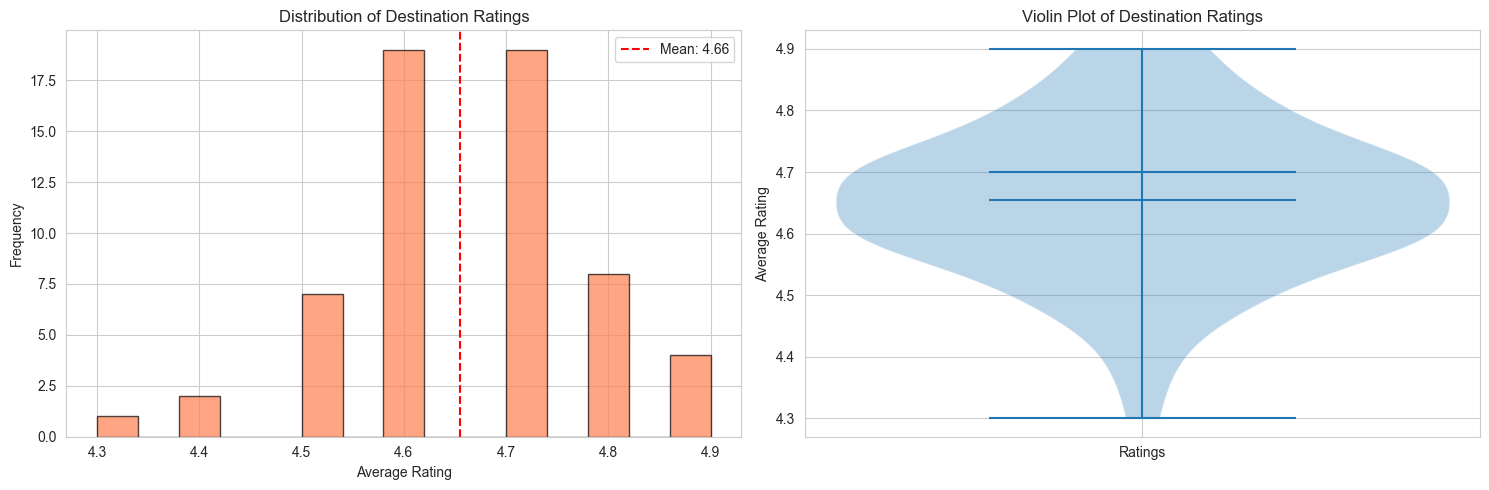

In [11]:
# Distribution of ratings
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['avg_rating'], bins=15, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Destination Ratings')
axes[0].axvline(df['avg_rating'].mean(), color='red', linestyle='--', label=f"Mean: {df['avg_rating'].mean():.2f}")
axes[0].legend()

# Violin plot
axes[1].violinplot([df['avg_rating']], vert=True, showmeans=True, showmedians=True)
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Violin Plot of Destination Ratings')
axes[1].set_xticks([1])
axes[1].set_xticklabels(['Ratings'])

plt.tight_layout()
plt.show()

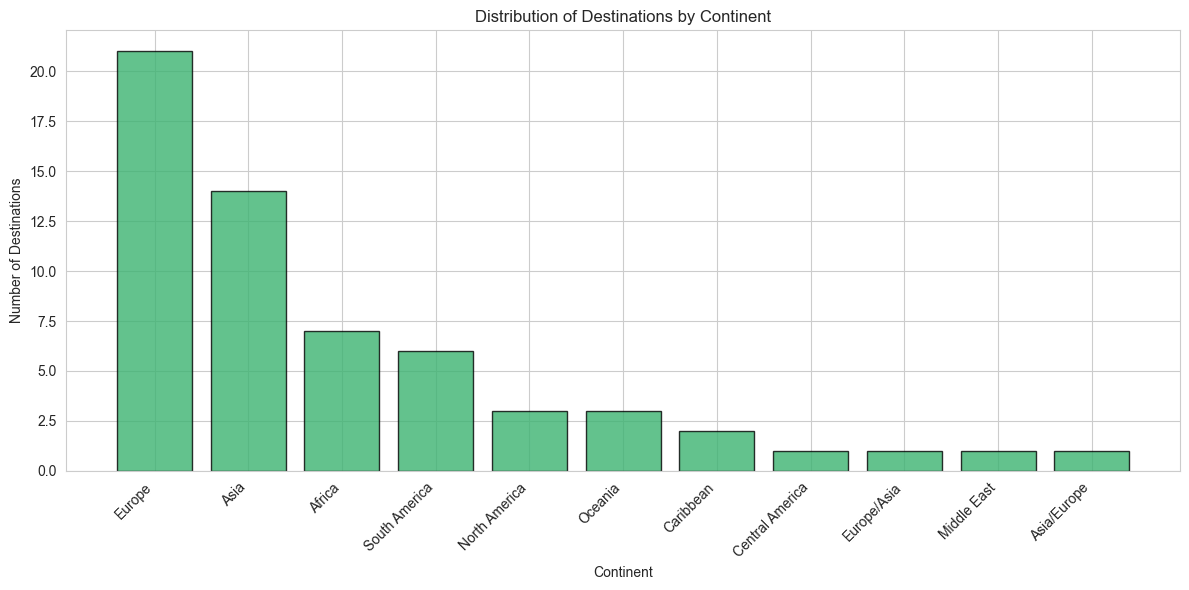


Destinations per Continent:
continent
Europe             21
Asia               14
Africa              7
South America       6
North America       3
Oceania             3
Caribbean           2
Central America     1
Europe/Asia         1
Middle East         1
Asia/Europe         1
Name: count, dtype: int64


In [12]:
# Distribution by continent
plt.figure(figsize=(12, 6))
continent_counts = df['continent'].value_counts()
plt.bar(continent_counts.index, continent_counts.values, color='mediumseagreen', edgecolor='black', alpha=0.8)
plt.xlabel('Continent')
plt.ylabel('Number of Destinations')
plt.title('Distribution of Destinations by Continent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nDestinations per Continent:")
print(continent_counts)

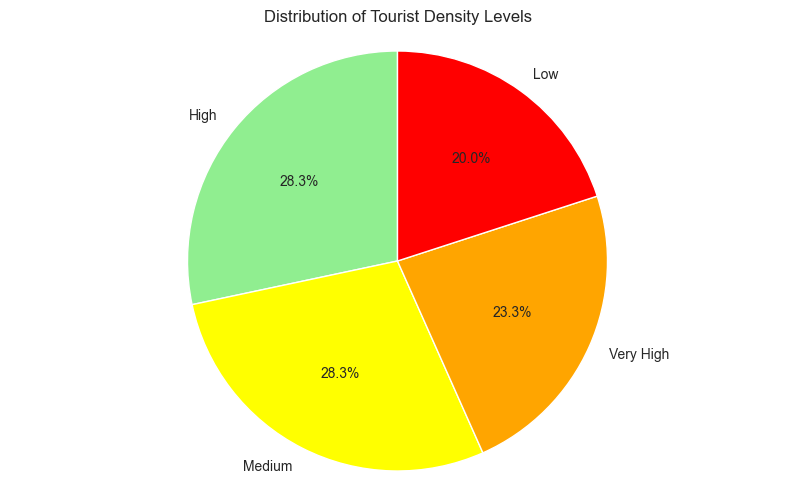


Tourist Density Distribution:
tourist_density
High         17
Medium       17
Very High    14
Low          12
Name: count, dtype: int64


In [13]:
# Tourist density distribution
plt.figure(figsize=(10, 6))
density_counts = df['tourist_density'].value_counts()
colors = ['lightgreen', 'yellow', 'orange', 'red']
plt.pie(density_counts.values, labels=density_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of Tourist Density Levels')
plt.axis('equal')
plt.show()

print("\nTourist Density Distribution:")
print(density_counts)

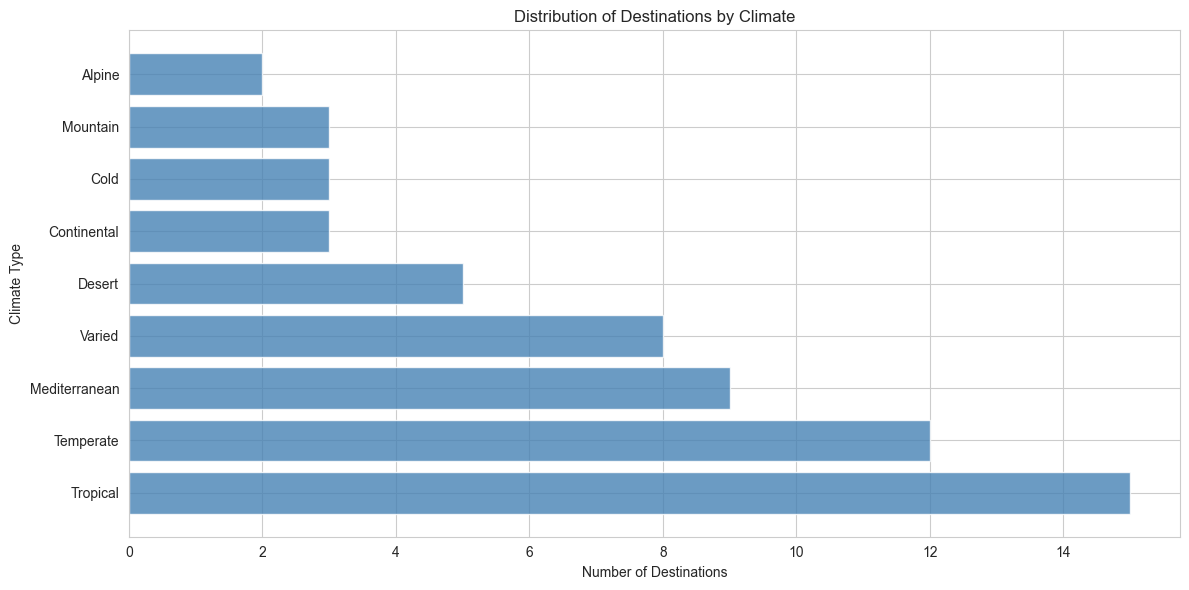

In [14]:
# Climate distribution
plt.figure(figsize=(12, 6))
climate_counts = df['climate'].value_counts()
plt.barh(climate_counts.index, climate_counts.values, color='steelblue', alpha=0.8)
plt.xlabel('Number of Destinations')
plt.ylabel('Climate Type')
plt.title('Distribution of Destinations by Climate')
plt.tight_layout()
plt.show()

### 5.4 Binary Feature Analysis

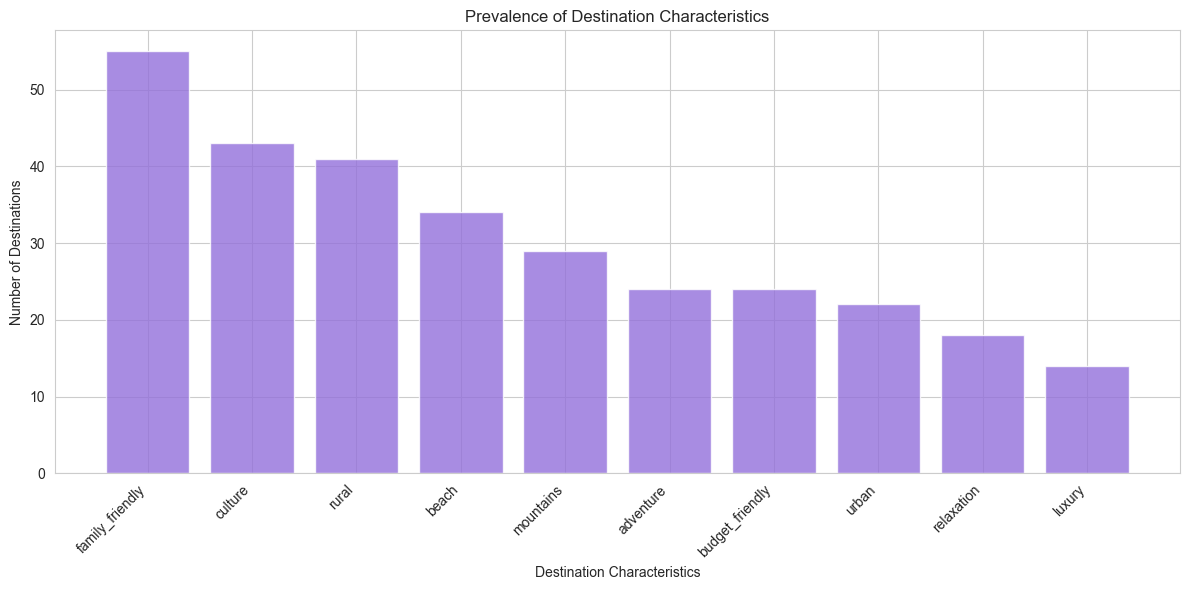


Destination Characteristics Count:
family_friendly    55
culture            43
rural              41
beach              34
mountains          29
adventure          24
budget_friendly    24
urban              22
relaxation         18
luxury             14
dtype: int64


In [15]:
# Analyze binary features (destination characteristics)
binary_features = ['beach', 'mountains', 'culture', 'adventure', 'relaxation', 
                   'family_friendly', 'budget_friendly', 'luxury', 'urban', 'rural']

binary_counts = df[binary_features].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(binary_counts.index, binary_counts.values, color='mediumpurple', alpha=0.8)
plt.xlabel('Destination Characteristics')
plt.ylabel('Number of Destinations')
plt.title('Prevalence of Destination Characteristics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nDestination Characteristics Count:")
print(binary_counts)

### 5.5 Correlation Analysis

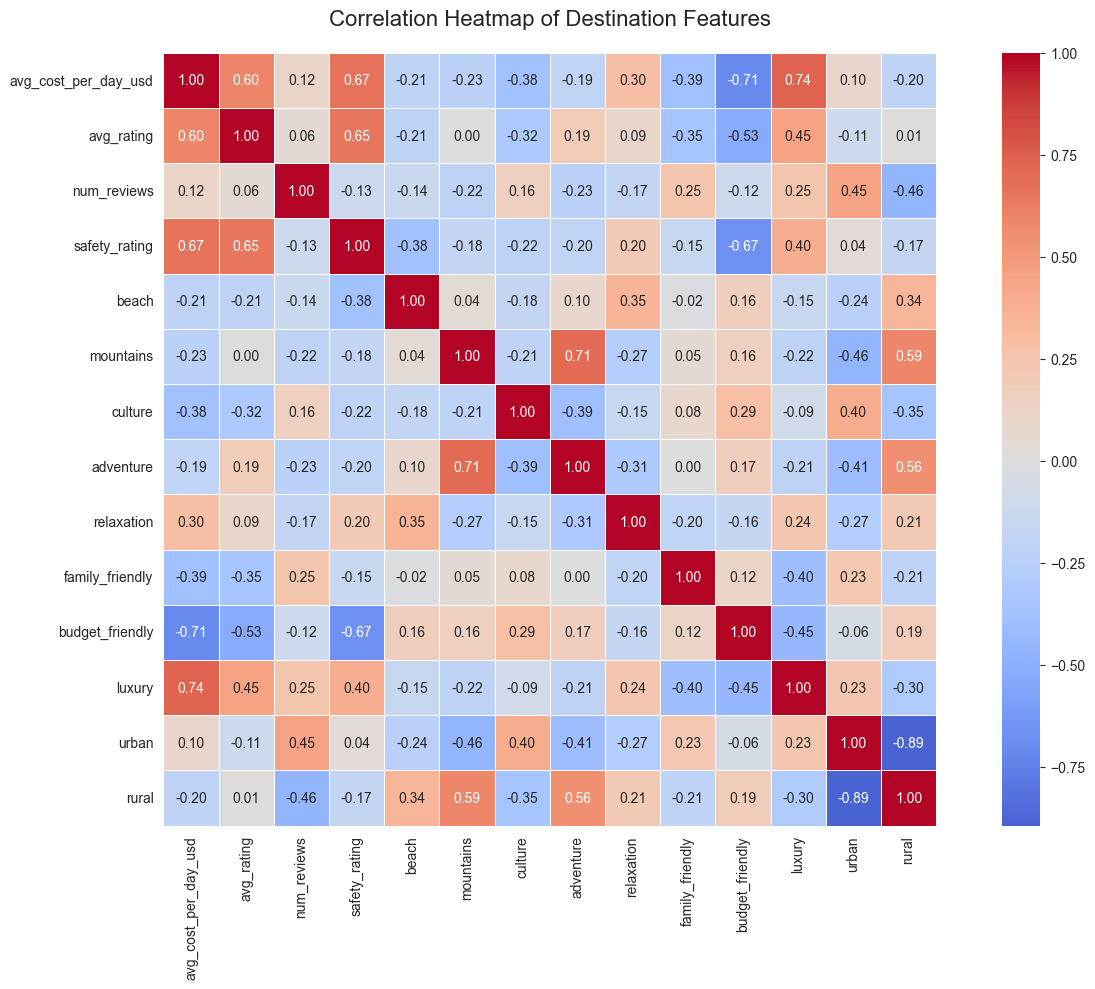


🔍 Key Correlations with Average Rating:
avg_rating              1.000000
safety_rating           0.652656
avg_cost_per_day_usd    0.599791
luxury                  0.452979
adventure               0.185967
relaxation              0.090633
num_reviews             0.055598
rural                   0.012961
mountains               0.001341
urban                  -0.113990
beach                  -0.208185
culture                -0.316647
family_friendly        -0.351444
budget_friendly        -0.525084
Name: avg_rating, dtype: float64


In [16]:
# Correlation matrix for numerical features
numerical_features = ['avg_cost_per_day_usd', 'avg_rating', 'num_reviews', 'safety_rating',
                      'beach', 'mountains', 'culture', 'adventure', 'relaxation',
                      'family_friendly', 'budget_friendly', 'luxury', 'urban', 'rural']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Destination Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\n🔍 Key Correlations with Average Rating:")
rating_corr = correlation_matrix['avg_rating'].sort_values(ascending=False)
print(rating_corr)

### 5.6 Relationship Analysis

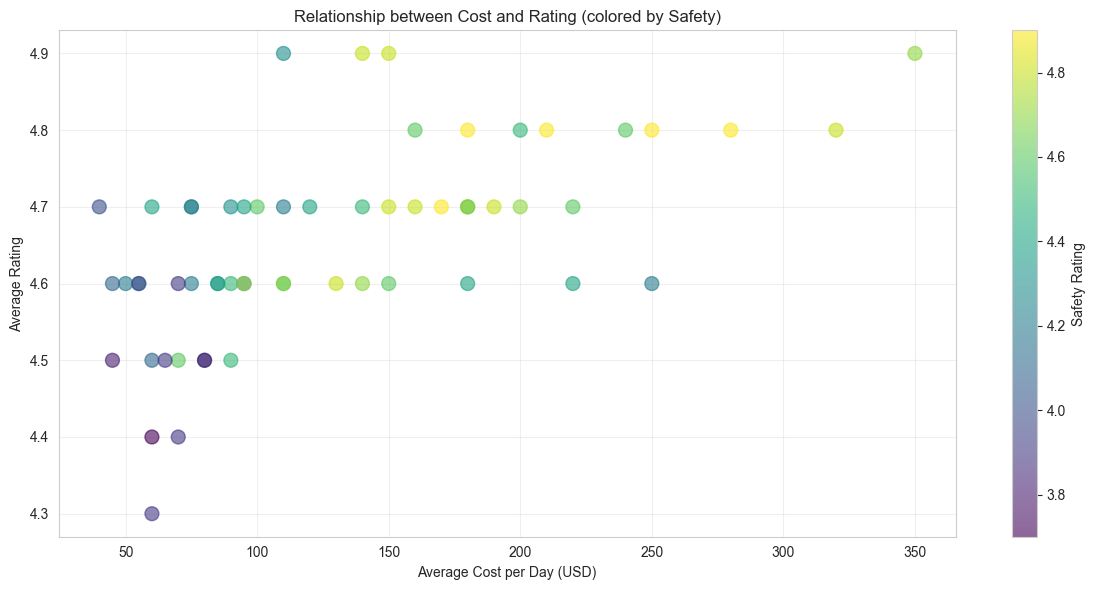


Correlation between Cost and Rating: 0.600


In [17]:
# Scatter plot: Cost vs Rating
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['avg_cost_per_day_usd'], df['avg_rating'], 
                     c=df['safety_rating'], cmap='viridis', alpha=0.6, s=100)
plt.colorbar(scatter, label='Safety Rating')
plt.xlabel('Average Cost per Day (USD)')
plt.ylabel('Average Rating')
plt.title('Relationship between Cost and Rating (colored by Safety)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
cost_rating_corr = df['avg_cost_per_day_usd'].corr(df['avg_rating'])
print(f"\nCorrelation between Cost and Rating: {cost_rating_corr:.3f}")

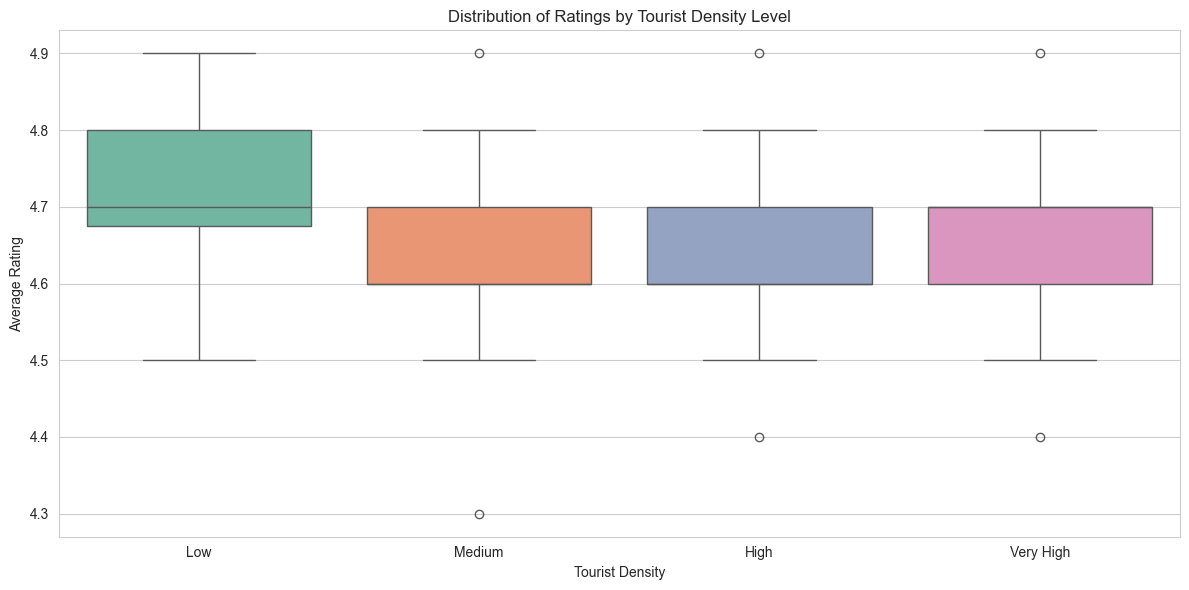

In [18]:
# Box plot: Rating by Tourist Density
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values('tourist_density')
density_order = ['Low', 'Medium', 'High', 'Very High']
sns.boxplot(data=df, x='tourist_density', y='avg_rating', order=density_order, palette='Set2')
plt.xlabel('Tourist Density')
plt.ylabel('Average Rating')
plt.title('Distribution of Ratings by Tourist Density Level')
plt.tight_layout()
plt.show()

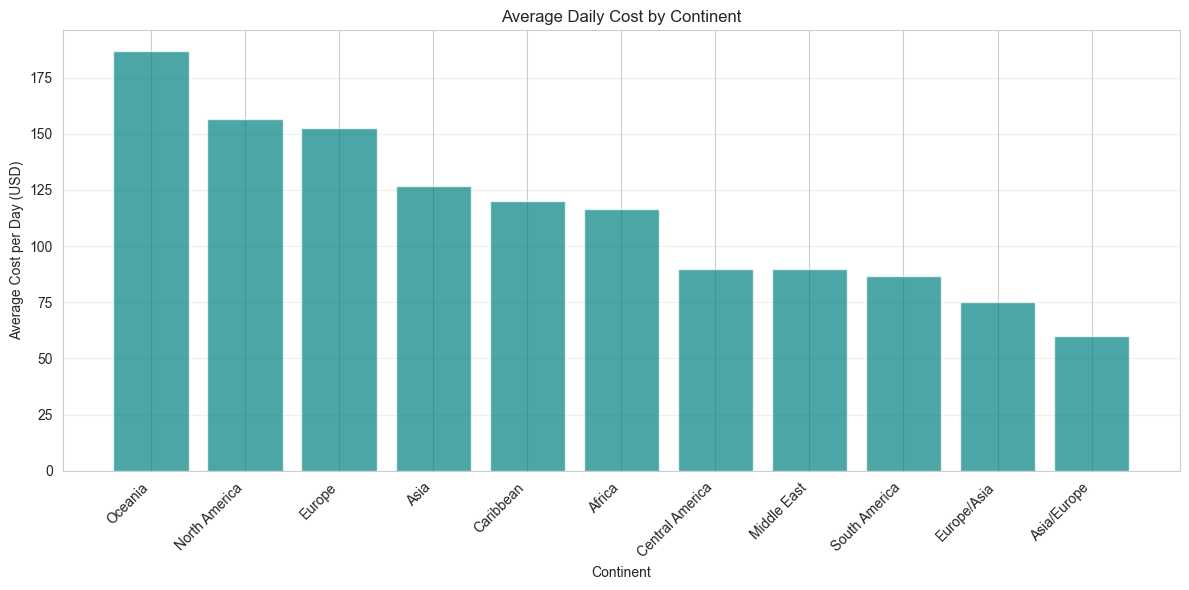


Average Cost by Continent:
continent
Oceania            186.666667
North America      156.666667
Europe             152.380952
Asia               126.785714
Caribbean          120.000000
Africa             116.428571
Central America     90.000000
Middle East         90.000000
South America       86.666667
Europe/Asia         75.000000
Asia/Europe         60.000000
Name: avg_cost_per_day_usd, dtype: float64


In [19]:
# Average cost by continent
plt.figure(figsize=(12, 6))
continent_cost = df.groupby('continent')['avg_cost_per_day_usd'].mean().sort_values(ascending=False)
plt.bar(continent_cost.index, continent_cost.values, color='teal', alpha=0.7)
plt.xlabel('Continent')
plt.ylabel('Average Cost per Day (USD)')
plt.title('Average Daily Cost by Continent')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAverage Cost by Continent:")
print(continent_cost)

---
## 6. Missing Value Analysis

In [20]:
# Check for missing values
print("🔍 Missing Values Analysis:")
print("="*60)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'], missing_df['Missing Percentage'], color='salmon')
    plt.xlabel('Column')
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")
    print(f"\nTotal cells: {df.shape[0] * df.shape[1]}")
    print(f"Complete cells: {df.shape[0] * df.shape[1]}")
    print(f"Data completeness: 100.0%")

🔍 Missing Values Analysis:
✅ No missing values found in the dataset!

Total cells: 1380
Complete cells: 1380
Data completeness: 100.0%


---
## 7. Class Imbalance Analysis

In [21]:
# Analyze class imbalance for categorical target variables
print("⚖️ Class Imbalance Analysis:")
print("="*60)

# Tourist Density (potential classification target)
print("\n1. Tourist Density Distribution:")
density_dist = df['tourist_density'].value_counts(normalize=True) * 100
print(density_dist)
print(f"Imbalance Ratio (max/min): {density_dist.max() / density_dist.min():.2f}")

# Budget vs Luxury destinations
print("\n2. Budget-Friendly Destinations:")
budget_dist = df['budget_friendly'].value_counts(normalize=True) * 100
print(f"Budget-friendly: {budget_dist.get(1, 0):.1f}%")
print(f"Not budget-friendly: {budget_dist.get(0, 0):.1f}%")

print("\n3. Luxury Destinations:")
luxury_dist = df['luxury'].value_counts(normalize=True) * 100
print(f"Luxury: {luxury_dist.get(1, 0):.1f}%")
print(f"Not luxury: {luxury_dist.get(0, 0):.1f}%")

⚖️ Class Imbalance Analysis:

1. Tourist Density Distribution:
tourist_density
High         28.333333
Medium       28.333333
Very High    23.333333
Low          20.000000
Name: proportion, dtype: float64
Imbalance Ratio (max/min): 1.42

2. Budget-Friendly Destinations:
Budget-friendly: 40.0%
Not budget-friendly: 60.0%

3. Luxury Destinations:
Luxury: 23.3%
Not luxury: 76.7%


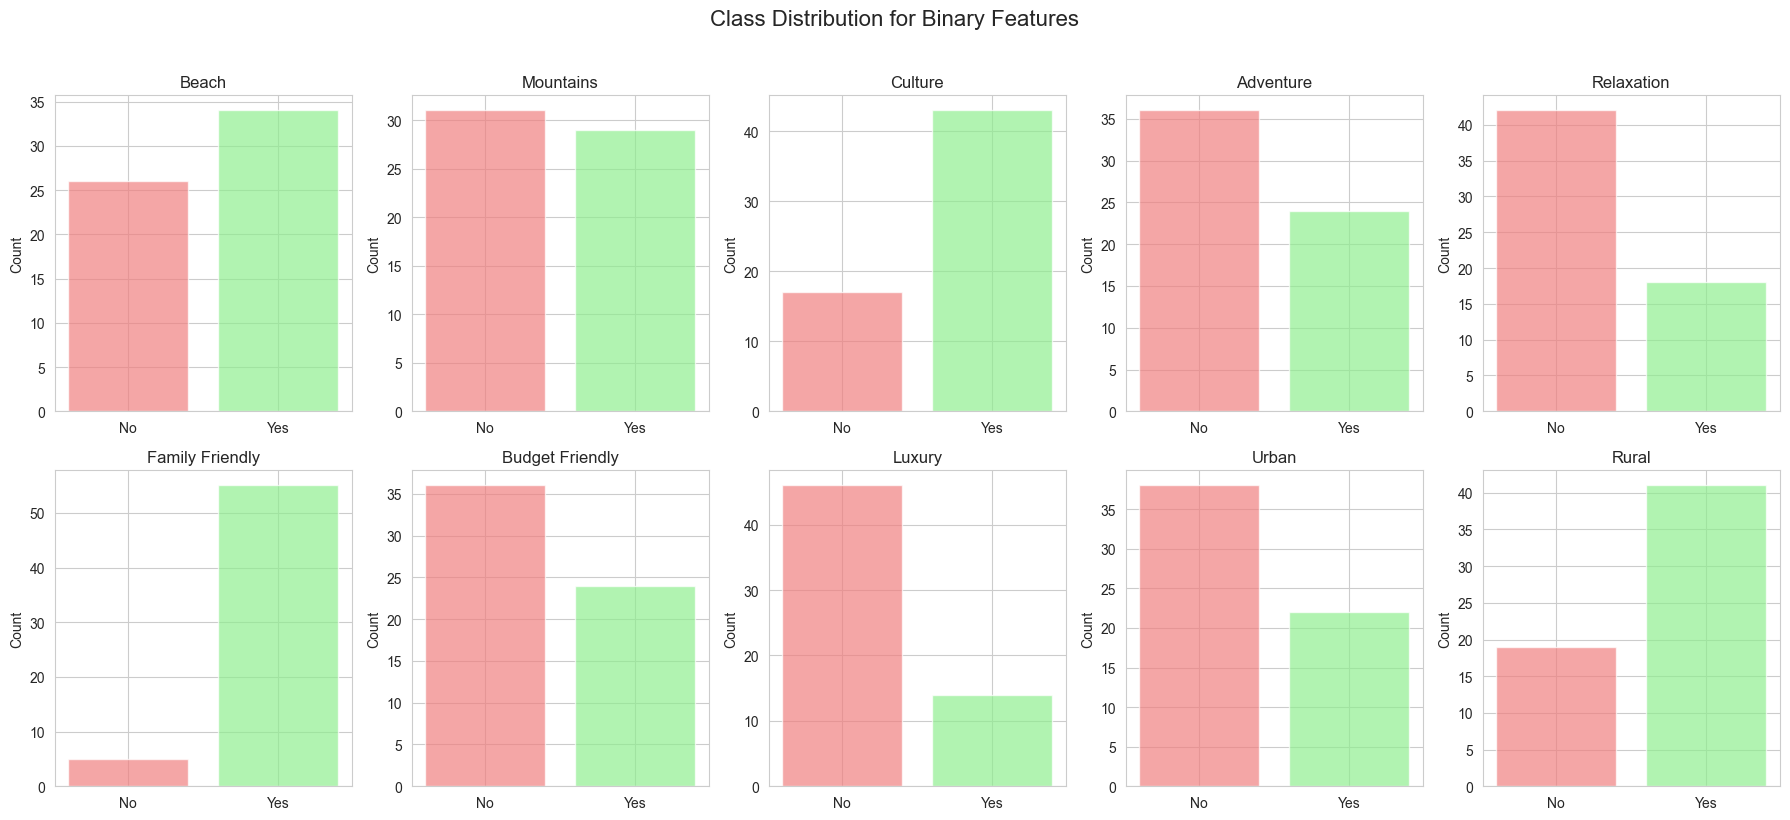

In [22]:
# Visualize class distribution for all binary features
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.ravel()

for idx, feature in enumerate(binary_features):
    feature_dist = df[feature].value_counts()
    axes[idx].bar(['No', 'Yes'], [feature_dist.get(0, 0), feature_dist.get(1, 0)], 
                  color=['lightcoral', 'lightgreen'], alpha=0.7)
    axes[idx].set_title(feature.replace('_', ' ').title())
    axes[idx].set_ylabel('Count')

plt.suptitle('Class Distribution for Binary Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

---
## 8. Data Preprocessing Techniques

### 8.1 Handling Missing Values

In [23]:
# Check if there are any missing values to handle
print("📊 Missing Values Treatment:")
print("="*60)

if df.isnull().sum().sum() == 0:
    print("✅ No missing values detected. No imputation needed.")
    df_processed = df.copy()
else:
    print("Applying imputation strategies...")
    df_processed = df.copy()
    
    # For numerical columns: use median imputation
    num_cols_with_missing = df_processed.select_dtypes(include=[np.number]).columns[df_processed.isnull().any()]
    if len(num_cols_with_missing) > 0:
        imputer_num = SimpleImputer(strategy='median')
        df_processed[num_cols_with_missing] = imputer_num.fit_transform(df_processed[num_cols_with_missing])
        print(f"✅ Median imputation applied to: {list(num_cols_with_missing)}")
    
    # For categorical columns: use mode imputation
    cat_cols_with_missing = df_processed.select_dtypes(include=['object']).columns[df_processed.isnull().any()]
    if len(cat_cols_with_missing) > 0:
        imputer_cat = SimpleImputer(strategy='most_frequent')
        df_processed[cat_cols_with_missing] = imputer_cat.fit_transform(df_processed[cat_cols_with_missing])
        print(f"✅ Mode imputation applied to: {list(cat_cols_with_missing)}")

print(f"\nTotal missing values after treatment: {df_processed.isnull().sum().sum()}")

📊 Missing Values Treatment:
✅ No missing values detected. No imputation needed.

Total missing values after treatment: 0


### 8.2 Feature Engineering

In [24]:
# Create new engineered features
print("🔧 Feature Engineering:")
print("="*60)

# 1. Cost category (Budget, Mid-range, Expensive, Luxury)
df_processed['cost_category'] = pd.cut(df_processed['avg_cost_per_day_usd'], 
                                        bins=[0, 75, 150, 250, 400],
                                        labels=['Budget', 'Mid-range', 'Expensive', 'Luxury'])
print("✅ Created 'cost_category' feature")

# 2. Rating category (Good, Very Good, Excellent)
df_processed['rating_category'] = pd.cut(df_processed['avg_rating'],
                                         bins=[0, 4.5, 4.7, 5.0],
                                         labels=['Good', 'Very Good', 'Excellent'])
print("✅ Created 'rating_category' feature")

# 3. Popularity score (based on number of reviews)
df_processed['popularity_score'] = pd.cut(df_processed['num_reviews'],
                                          bins=[0, 3000, 6000, 10000, 20000],
                                          labels=['Low', 'Medium', 'High', 'Very High'])
print("✅ Created 'popularity_score' feature")

# 4. Nature score (combination of beach, mountains, rural)
df_processed['nature_score'] = df_processed['beach'] + df_processed['mountains'] + df_processed['rural']
print("✅ Created 'nature_score' feature (0-3 scale)")

# 5. Activity diversity (count of activity types)
activity_cols = ['beach', 'mountains', 'culture', 'adventure', 'relaxation']
df_processed['activity_diversity'] = df_processed[activity_cols].sum(axis=1)
print("✅ Created 'activity_diversity' feature")

# 6. Value for money (rating / cost ratio)
df_processed['value_for_money'] = df_processed['avg_rating'] / (df_processed['avg_cost_per_day_usd'] / 100)
print("✅ Created 'value_for_money' feature")

print(f"\n📊 New shape after feature engineering: {df_processed.shape}")
print(f"Added {df_processed.shape[1] - df.shape[1]} new features")

🔧 Feature Engineering:
✅ Created 'cost_category' feature
✅ Created 'rating_category' feature
✅ Created 'popularity_score' feature
✅ Created 'nature_score' feature (0-3 scale)
✅ Created 'activity_diversity' feature
✅ Created 'value_for_money' feature

📊 New shape after feature engineering: (60, 29)
Added 6 new features


In [25]:
# Display new features
print("\n📋 Sample of engineered features:")
engineered_cols = ['destination_name', 'avg_cost_per_day_usd', 'cost_category', 
                   'avg_rating', 'rating_category', 'popularity_score', 
                   'nature_score', 'activity_diversity', 'value_for_money']
df_processed[engineered_cols].head(10)


📋 Sample of engineered features:


,destination_name,avg_cost_per_day_usd,cost_category,avg_rating,rating_category,popularity_score,nature_score,activity_diversity,value_for_money
0,Bali,75,Budget,4.7,Very Good,Medium,2,4,6.266667
1,Paris,200,Expensive,4.8,Excellent,Very High,0,1,2.400000
2,Tokyo,150,Mid-range,4.9,Excellent,High,0,1,3.266667
3,Maldives,350,Luxury,4.9,Excellent,Medium,2,2,1.400000
4,New York,250,Expensive,4.6,Very Good,Very High,0,1,1.840000
5,Iceland,180,Expensive,4.8,Excellent,Medium,2,2,2.666667
6,Dubai,220,Expensive,4.7,Very Good,High,1,2,2.136364
7,Rome,120,Mid-range,4.7,Very Good,Very High,0,1,3.916667
8,Costa Rica,90,Mid-range,4.6,Very Good,High,3,3,5.111111
9,Santorini,160,Expensive,4.8,Excellent,High,2,3,3.000000


### 8.3 Encoding Categorical Variables

In [26]:
# Label encoding for ordinal variables
print("🔤 Encoding Categorical Variables:")
print("="*60)

# Create a copy for encoded data
df_encoded = df_processed.copy()

# Label encode tourist_density (ordinal)
density_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
df_encoded['tourist_density_encoded'] = df_encoded['tourist_density'].map(density_mapping)
print("✅ Label encoded 'tourist_density' (ordinal)")

# One-hot encode nominal categorical variables
nominal_features = ['continent', 'climate', 'season']

for feature in nominal_features:
    # Create dummy variables
    dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    print(f"✅ One-hot encoded '{feature}' ({len(dummies.columns)} new columns)")

print(f"\n📊 Shape after encoding: {df_encoded.shape}")
print(f"Added {df_encoded.shape[1] - df_processed.shape[1]} encoded features")

🔤 Encoding Categorical Variables:
✅ Label encoded 'tourist_density' (ordinal)
✅ One-hot encoded 'continent' (10 new columns)
✅ One-hot encoded 'climate' (8 new columns)
✅ One-hot encoded 'season' (6 new columns)

📊 Shape after encoding: (60, 54)
Added 25 encoded features


### 8.4 Feature Scaling and Normalization

In [27]:
# Normalize numerical features for ML algorithms
print("📏 Feature Scaling:")
print("="*60)

# Select numerical features to scale
features_to_scale = ['avg_cost_per_day_usd', 'avg_rating', 'num_reviews', 
                     'safety_rating', 'nature_score', 'activity_diversity', 'value_for_money']

# Create a copy for scaled data
df_scaled = df_encoded.copy()

# Apply StandardScaler (z-score normalization)
scaler = StandardScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

print("✅ Applied StandardScaler (z-score normalization)")
print(f"   Scaled features: {features_to_scale}")
print("\n📊 Statistics after scaling (should have mean≈0, std≈1):")
print(df_scaled[features_to_scale].describe().loc[['mean', 'std']])

📏 Feature Scaling:
✅ Applied StandardScaler (z-score normalization)
   Scaled features: ['avg_cost_per_day_usd', 'avg_rating', 'num_reviews', 'safety_rating', 'nature_score', 'activity_diversity', 'value_for_money']

📊 Statistics after scaling (should have mean≈0, std≈1):
      avg_cost_per_day_usd    avg_rating   num_reviews  safety_rating  \
mean         -1.165734e-16 -2.364775e-15 -1.258253e-16   3.519407e-15   
std           1.008439e+00  1.008439e+00  1.008439e+00   1.008439e+00   

      nature_score  activity_diversity  value_for_money  
mean -9.992007e-17       -8.141636e-17     2.174187e-17  
std   1.008439e+00        1.008439e+00     1.008439e+00  


### 8.5 Outlier Detection and Treatment

In [28]:
# Detect outliers using IQR method
print("🔍 Outlier Detection (IQR Method):")
print("="*60)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in key numerical features
outlier_features = ['avg_cost_per_day_usd', 'num_reviews', 'avg_rating', 'safety_rating']

for feature in outlier_features:
    outliers, lower, upper = detect_outliers_iqr(df_processed, feature)
    print(f"\n{feature}:")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df_processed)*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Outlier destinations: {outliers['destination_name'].tolist()[:5]}")

🔍 Outlier Detection (IQR Method):

avg_cost_per_day_usd:
  Bounds: [-82.50, 337.50]
  Outliers: 1 (1.7%)
  Outlier destinations: ['Maldives']

num_reviews:
  Bounds: [-875.00, 13925.00]
  Outliers: 1 (1.7%)
  Outlier destinations: ['New York']

avg_rating:
  Bounds: [4.45, 4.85]
  Outliers: 7 (11.7%)
  Outlier destinations: ['Tokyo', 'Maldives', 'Machu Picchu', 'New Zealand', 'Egypt']

safety_rating:
  Bounds: [3.45, 5.45]
  Outliers: 0 (0.0%)


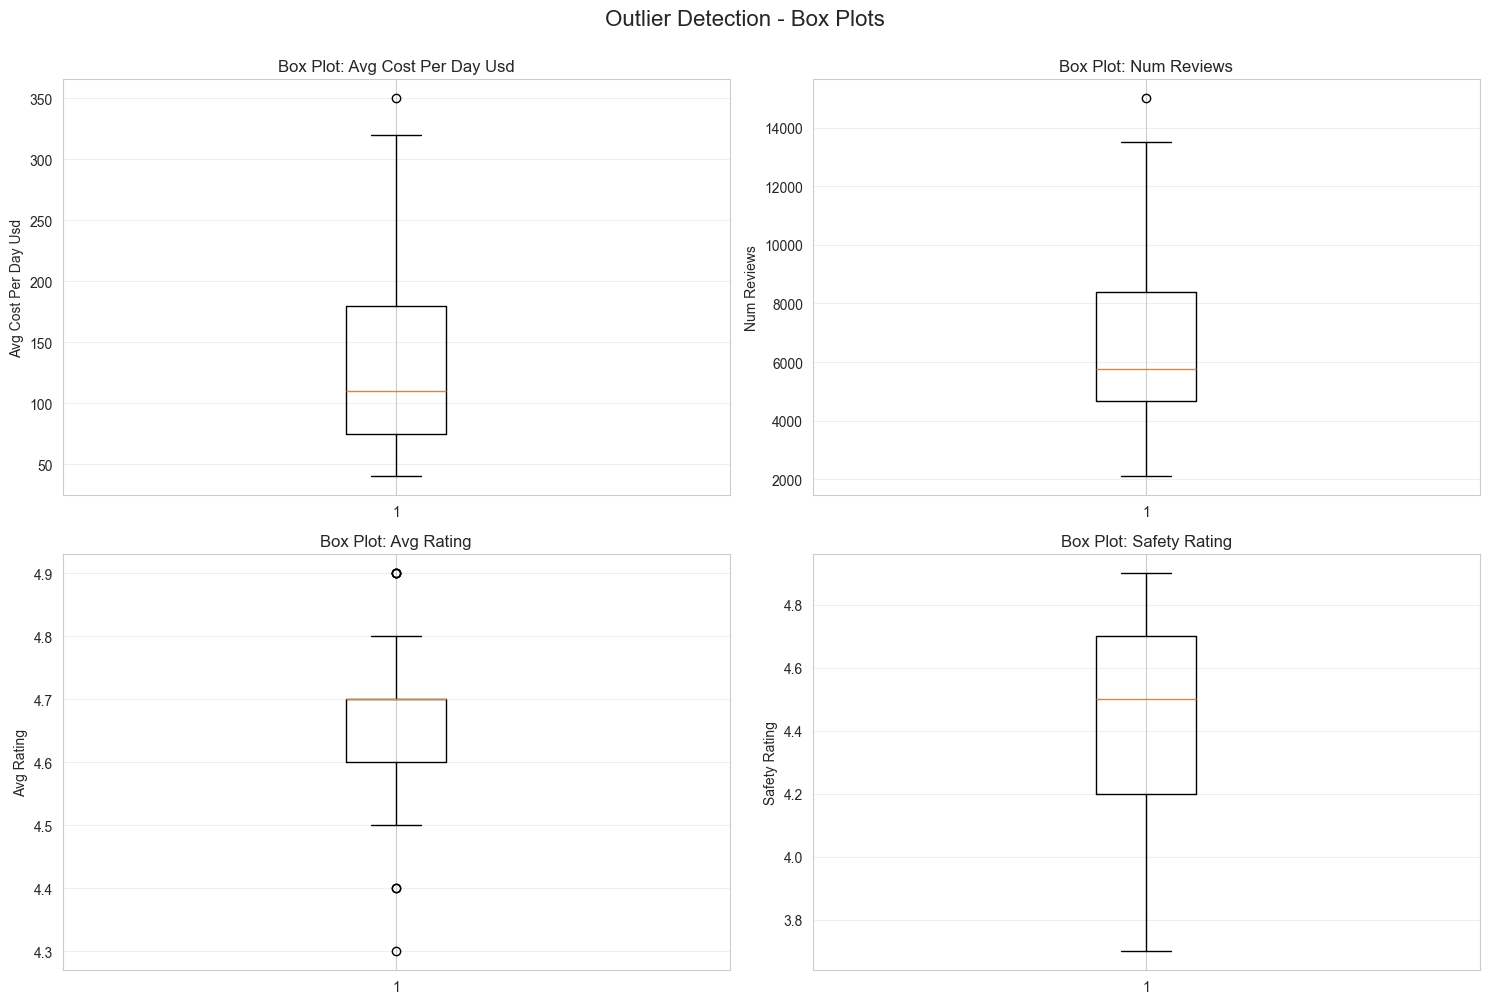


📌 Note: Outliers are not removed as they represent legitimate high-end 
   or popular destinations (e.g., Maldives for cost, Paris for reviews).
   They will be kept for model training as they provide valuable information.


In [29]:
# Visualize outliers with box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(outlier_features):
    axes[idx].boxplot(df_processed[feature], vert=True)
    axes[idx].set_ylabel(feature.replace('_', ' ').title())
    axes[idx].set_title(f'Box Plot: {feature.replace("_", " ").title()}')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Outlier Detection - Box Plots', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

print("\n📌 Note: Outliers are not removed as they represent legitimate high-end ")
print("   or popular destinations (e.g., Maldives for cost, Paris for reviews).")
print("   They will be kept for model training as they provide valuable information.")

### 8.6 Save Preprocessed Data

In [30]:
# Save preprocessed datasets for future phases
print("💾 Saving Preprocessed Datasets:")
print("="*60)

# Save processed data (with engineered features)
df_processed.to_csv('Dataset/travel_destinations_processed.csv', index=False)
print("✅ Saved: travel_destinations_processed.csv")

# Save encoded data (ready for ML)
df_encoded.to_csv('Dataset/travel_destinations_encoded.csv', index=False)
print("✅ Saved: travel_destinations_encoded.csv")

# Save scaled data (for algorithms requiring normalization)
df_scaled.to_csv('Dataset/travel_destinations_scaled.csv', index=False)
print("✅ Saved: travel_destinations_scaled.csv")

print("\n✨ All preprocessed datasets saved successfully!")

💾 Saving Preprocessed Datasets:
✅ Saved: travel_destinations_processed.csv
✅ Saved: travel_destinations_encoded.csv
✅ Saved: travel_destinations_scaled.csv

✨ All preprocessed datasets saved successfully!


---
## 9. Summary of Preprocessing Steps

### Applied Preprocessing Techniques:

| Step | Technique | Justification |
|------|-----------|---------------|
| 1 | **Missing Value Treatment** | Used median/mode imputation (none needed in current dataset) |
| 2 | **Feature Engineering** | Created cost_category, rating_category, nature_score, activity_diversity, and value_for_money to capture domain knowledge |
| 3 | **Categorical Encoding** | Applied label encoding for ordinal (tourist_density) and one-hot encoding for nominal variables (continent, climate, season) |
| 4 | **Feature Scaling** | Applied StandardScaler for algorithms sensitive to scale (SVM, KNN, Neural Networks) |
| 5 | **Outlier Detection** | Identified outliers using IQR method but retained them as they represent legitimate luxury/popular destinations |

### Dataset Versions Created:
1. **travel_destinations_processed.csv** - With engineered features
2. **travel_destinations_encoded.csv** - Categorical variables encoded
3. **travel_destinations_scaled.csv** - Normalized for ML algorithms

### Key Insights:
- ✅ Dataset has **60 destinations** with **23 original features**
- ✅ **No missing values** detected
- ✅ **6 new engineered features** created
- ✅ Data is ready for **supervised learning** (Phase 2)
- ✅ Data is ready for **unsupervised learning** (Phase 3)

### Next Steps (Phase 2):
1. Build classification models to predict travel_style and tourist_density
2. Build regression models to predict avg_rating and avg_cost
3. Compare different ML algorithms (Decision Trees, Random Forest, SVM, KNN)
4. Evaluate model performance using appropriate metrics
5. Perform hyperparameter tuning

---
## 10. Final Verification

In [31]:
# Final verification of preprocessed data
print("🎯 Final Verification:")
print("="*60)
print(f"✅ Original dataset: {df.shape}")
print(f"✅ Processed dataset: {df_processed.shape}")
print(f"✅ Encoded dataset: {df_encoded.shape}")
print(f"✅ Scaled dataset: {df_scaled.shape}")
print(f"\n✅ Missing values: {df_processed.isnull().sum().sum()}")
print(f"✅ Duplicate rows: {df_processed.duplicated().sum()}")
print(f"\n✨ Phase 1 completed successfully!")
print(f"📝 Ready for Phase 2: Supervised Learning")

🎯 Final Verification:
✅ Original dataset: (60, 23)
✅ Processed dataset: (60, 29)
✅ Encoded dataset: (60, 54)
✅ Scaled dataset: (60, 54)

✅ Missing values: 0
✅ Duplicate rows: 0

✨ Phase 1 completed successfully!
📝 Ready for Phase 2: Supervised Learning
